In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
sys.path

['',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/home/jbourbeau/.local/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/root-v5.34.18/lib',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/lib/python2.7/site-packages',
 '/data/user/jbourbeau/metaprojects/icerec/V05-00-00/build/lib',
 '/home/jbourbeau/cr-composition/analysis/qualitycuts',
 '/home/jbourbeau',
 '/home/jbourbeau/useful',
 '/home/jbourbeau/anisotropy',
 '/home/jbourbeau/ShowerLLH_scripts',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python27.zip',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86

In [2]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

# from composition.analysis import load_sim
# import composition.analysis.plotting_functions as plotting
# import composition.analysis.data_functions as data_functions
import composition as comp

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
sns.set_palette('muted')
sns.set_color_codes()

/home/jbourbeau/cr-composition/composition/load_sim.py:105: RuntimeWarning: divide by zero encountered in log10
  df['log_NChannels_1_30'] = np.nan_to_num(np.log10(df['NChannels_1_30']))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.0, 0.15155603823059838, 0.14242573078356316, 0.139133486872619, 0.060757797284838926, 0.05805015743284746, 0.05502913333872734, 0.05502571460154048, 0.05499494596685876, 0.04459400786537469, 0.029967510600934225]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.0, 0.30668123808427644, 0.2898268637530669, 0.28314323255275964, 0.12435656517195678, 0.11861308669803548, 0.11470205135627003, 0.11469635346095859, 0.11465532861471629, 0.09056462723799083, 0.06064497895767262]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.0, 0.15638329513844176, 0.14842903328368567, 0.14410888905855954, 0.0609139196163721, 0.0576968879235388, 0.0544228772775912, 0.05441831896134206, 0.054413760645092915, 0.040613458200809784, 0.02866725089086593]


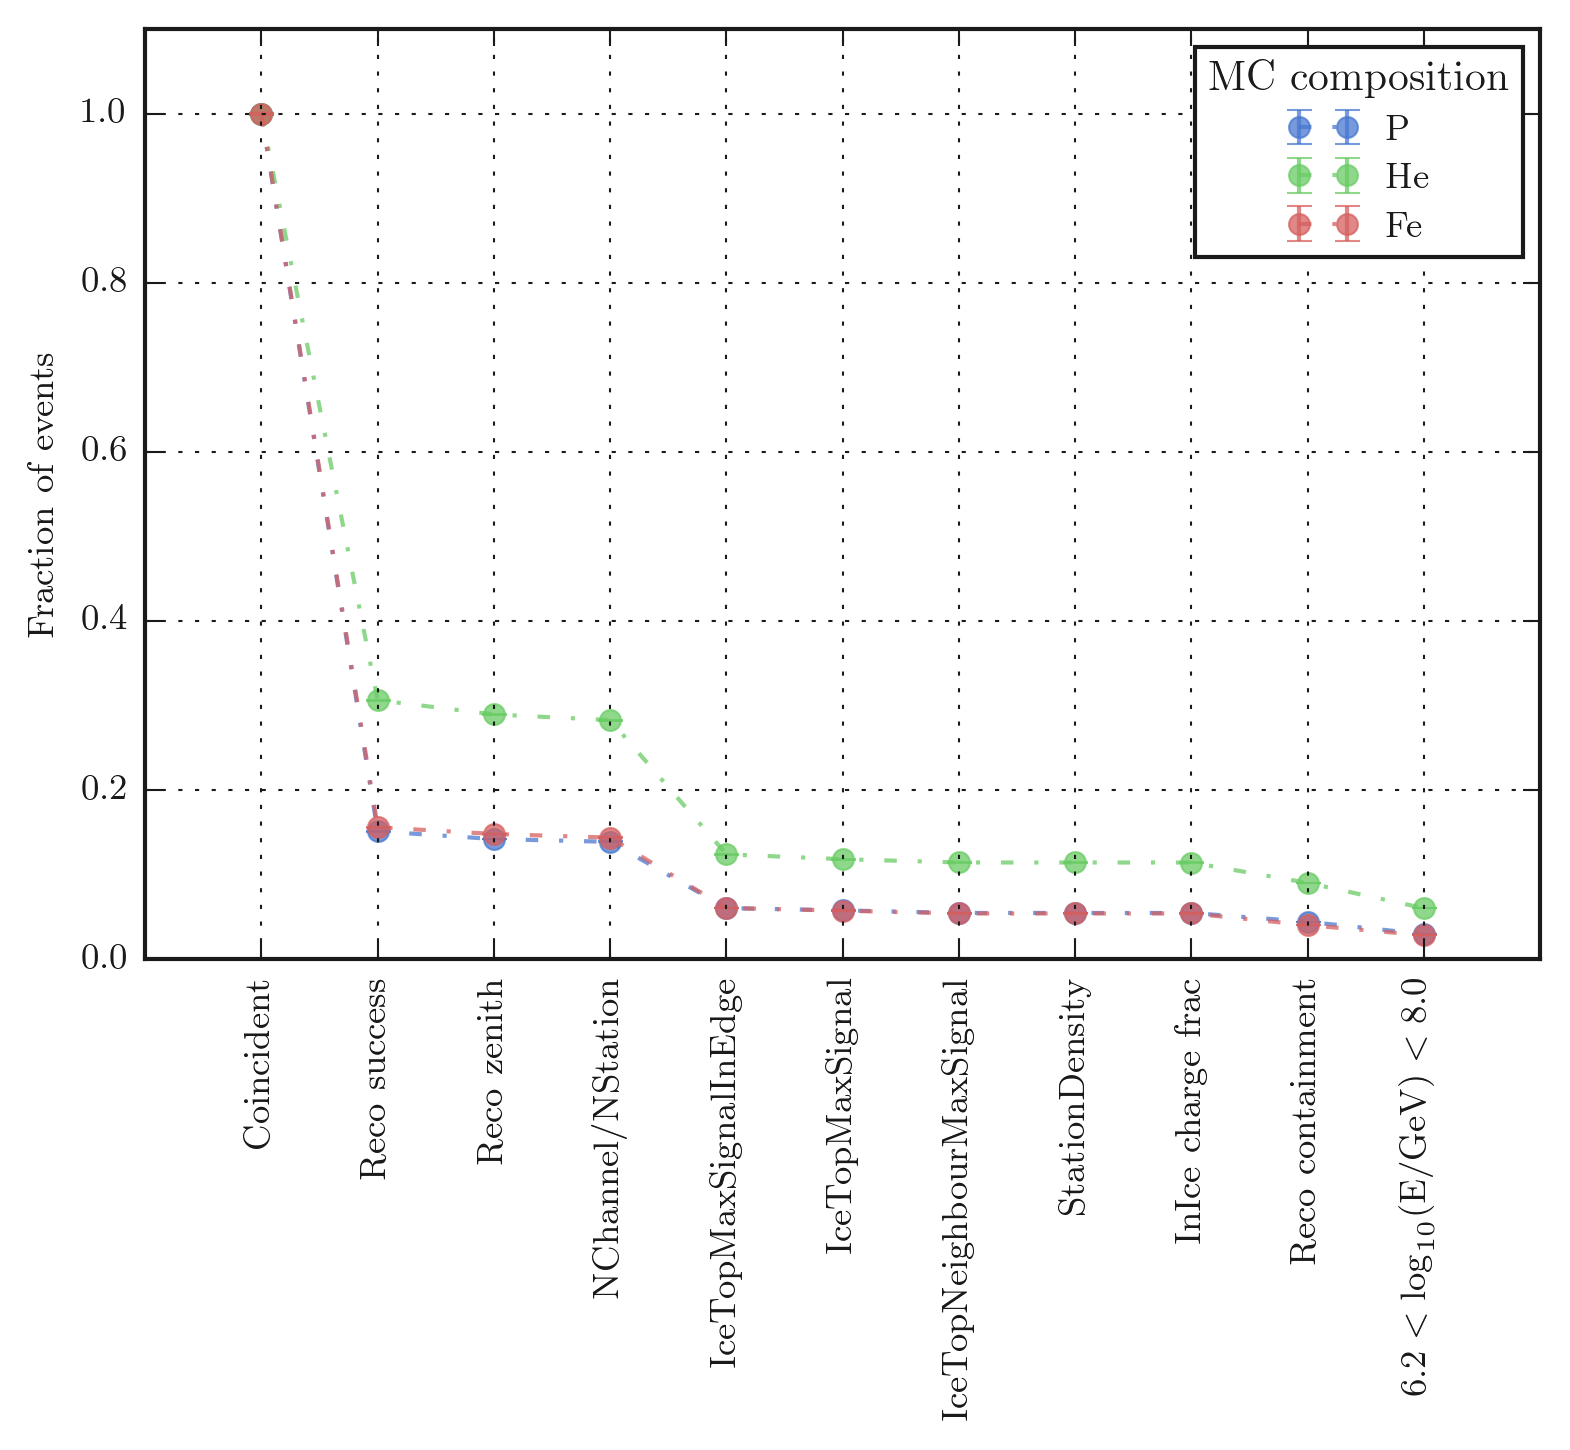

In [4]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list: 
    standard_cut_keys = ['lap_reco_success', 'lap_zenith', 'num_hits_1_30', 'IceTopMaxSignalInEdge',
                         'IceTopMaxSignal', 'IceTopNeighbourMaxSignal', 
                         'StationDensity', 'max_qfrac_1_30', 'lap_containment', 'energy_range_lap']
    labels = ['Reco success', 'Reco zenith', 'NChannel/NStation', 'IceTopMaxSignalInEdge',
              'IceTopMaxSignal', 'IceTopNeighbourMaxSignal',
              'StationDensity', 'InIce charge frac', 'Reco containment', '$6.2 < \log_{10}(\mathrm{E/GeV}) < 8.0$']
    # Import ShowerLLH sim reconstructions and cuts to be made
    df, cut_dict = comp.load_sim(return_cut_dict=True)
    selection_mask = (df.MC_comp == composition).values
#     selection_mask = np.array([True]*len(df))
    n_tot = len(df)
    n_tot_err = np.sqrt(len(df))
    initial, initial_err = comp.ratio_error(
            n_tot, n_tot_err,
            n_tot, n_tot_err)

    event_flow = [initial]
    event_flow_err = [initial_err]
    for cut_key, label in zip(standard_cut_keys, labels):
        selection_mask = selection_mask & cut_dict[cut_key]
        df_cuts = df[selection_mask]
        ratio, ratio_err = comp.ratio_error(
            len(df_cuts), np.sqrt(len(df_cuts)),
            n_tot, n_tot_err)
        event_flow.append(ratio)
        event_flow_err.append(ratio_err)
    #     event_flow.append(len(df_cuts)/n_tot)
    #     event_flow_err.append(np.sqrt(len(df_cuts))/n_tot)

#     fig, ax = plt.subplots()
    x = range(len(standard_cut_keys)+1)
    print(x)
    print(event_flow)
    ax.errorbar(x, event_flow, yerr=event_flow_err,
               marker='.', linestyle='-.', label=composition, alpha=0.75)
    ax.grid()
    # ax.set_ylim([1e-1,1e5])
    # ax.set_yscale("log", nonposy='clip')
    # ax.set_xlabel('True IT Containment Fraction')
    plt.xticks(x, ['Coincident'] + labels, rotation='vertical')
    ax.set_ylabel('Fraction of events')
    ax.set_xlim([-1, len(x)])
    ax.set_ylim([0, 1.1])
plt.legend(title='MC composition')
plt.show()